In [4]:
import pandas as pd
df_tweets_misinfo = pd.read_csv('C:/Users/jr24440/Downloads/twitter-map_Climate_Change_Misinformation.csv')

In [5]:
import pandas as pd
df_tweets = pd.read_csv('C:/Users/jr24440/Downloads/twitter-map_Climate_Change.csv')

In [37]:
import re
import pandas as pd

# Extended list of regex patterns for misinformation-related terms
misinfo_patterns = [
    r'fake\w*',         # matches "fake", "faked", "faking", etc.
    r'misinform\w*',    # matches "misinform", "misinformed", "misinformation", etc.
    r'hoax\w*',         # matches "hoax", "hoaxed", "hoaxes", etc.
    r'conspir\w*',      # matches "conspiracy", "conspiracies", etc.
    r'scam\w*',         # matches "scam", "scammed", "scamming", etc.
    r'false\w*',        # matches "false", "falsified", "falsehood", etc.
    r'rumor\w*',        # matches "rumor", "rumors", etc.
    r'fabricat\w*',     # matches "fabricate", "fabricated", "fabrication", etc.
    r'clickbait',       # matches "clickbait"
    r'propagan\w*',     # matches "propaganda", "propagandist", etc.
    r'decept\w*',       # matches "deception", "deceptive", etc.
    r'lie\w*',          # matches "lie", "lied", "lying", etc.
    r'myth\w*',         # matches "myth", "myths", etc.
    r'counterfeit\w*',  # matches "counterfeit", "counterfeiting", etc.
    r'bogus',          # matches "bogus"
    r'exaggerat\w*',    # matches "exaggerate", "exaggerated", etc.
    r'distort\w*',      # matches "distort", "distorted", etc.
    r'mislead\w*',      # matches "mislead", "misleading", etc.
    r'erroneous',       # matches "erroneous"
    r'impost\w*',       # matches "imposter", "impostor", etc.
    r'manipulat\w*',    # matches "manipulate", "manipulated", "manipulating", etc.
    r'unsubstantiat\w*' # matches "unsubstantiated", etc.
]

# Combine the patterns into one regex pattern, using the OR operator.
misinfo_regex = re.compile('|'.join(misinfo_patterns), re.IGNORECASE)

# Flag tweets if any of the misinformation patterns are found in the cleaned text.
df_tweets['misinfo_flag'] = df_tweets['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))

# Estimate count and proportion of tweets flagged as misinformation.
misinfo_count = df_tweets['misinfo_flag'].sum()
total_tweets = len(df_tweets)
print(f"Total tweets flagged as misinformation: {misinfo_count}")
print(f"Proportion of tweets flagged: {misinfo_count/total_tweets:.2%}")


Total tweets flagged as misinformation: 15049
Proportion of tweets flagged: 5.22%


In [38]:
import re
import pandas as pd

# Extended list of regex patterns for misinformation-related terms
misinfo_patterns = [
    r'fake\w*',         # matches "fake", "faked", "faking", etc.
    r'misinform\w*',    # matches "misinform", "misinformed", "misinformation", etc.
    r'hoax\w*',         # matches "hoax", "hoaxed", "hoaxes", etc.
    r'conspir\w*',      # matches "conspiracy", "conspiracies", etc.
    r'scam\w*',         # matches "scam", "scammed", "scamming", etc.
    r'false\w*',        # matches "false", "falsified", "falsehood", etc.
    r'rumor\w*',        # matches "rumor", "rumors", etc.
    r'fabricat\w*',     # matches "fabricate", "fabricated", "fabrication", etc.
    r'clickbait',       # matches "clickbait"
    r'propagan\w*',     # matches "propaganda", "propagandist", etc.
    r'decept\w*',       # matches "deception", "deceptive", etc.
    r'lie\w*',          # matches "lie", "lied", "lying", etc.
    r'myth\w*',         # matches "myth", "myths", etc.
    r'counterfeit\w*',  # matches "counterfeit", "counterfeiting", etc.
    r'bogus',          # matches "bogus"
    r'exaggerat\w*',    # matches "exaggerate", "exaggerated", etc.
    r'distort\w*',      # matches "distort", "distorted", etc.
    r'mislead\w*',      # matches "mislead", "misleading", etc.
    r'erroneous',       # matches "erroneous"
    r'impost\w*',       # matches "imposter", "impostor", etc.
    r'manipulat\w*',    # matches "manipulate", "manipulated", "manipulating", etc.
    r'unsubstantiat\w*' # matches "unsubstantiated", etc.
]

# Combine the patterns into one regex pattern, using the OR operator.
misinfo_regex = re.compile('|'.join(misinfo_patterns), re.IGNORECASE)

# Flag tweets if any of the misinformation patterns are found in the cleaned text.
df_tweets_misinfo['misinfo_flag'] = df_tweets_misinfo['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))

# Estimate count and proportion of tweets flagged as misinformation.
misinfo_count_misinfo = df_tweets_misinfo['misinfo_flag'].sum()
total_tweets_misinfo = len(df_tweets)
print(f"Total tweets flagged as misinformation: {misinfo_count_misinfo}")
print(f"Proportion of tweets flagged: {misinfo_count_misinfo/total_tweets_misinfo:.2%}")


Total tweets flagged as misinformation: 67949
Proportion of tweets flagged: 23.55%


              precision    recall  f1-score   support

           0       0.88      0.89      0.89     55201
           1       0.88      0.87      0.88     51040

    accuracy                           0.88    106241
   macro avg       0.88      0.88      0.88    106241
weighted avg       0.88      0.88      0.88    106241

Confusion Matrix:
[[49368  5833]
 [ 6576 44464]]
ROC AUC Score: 0.9542514811501926


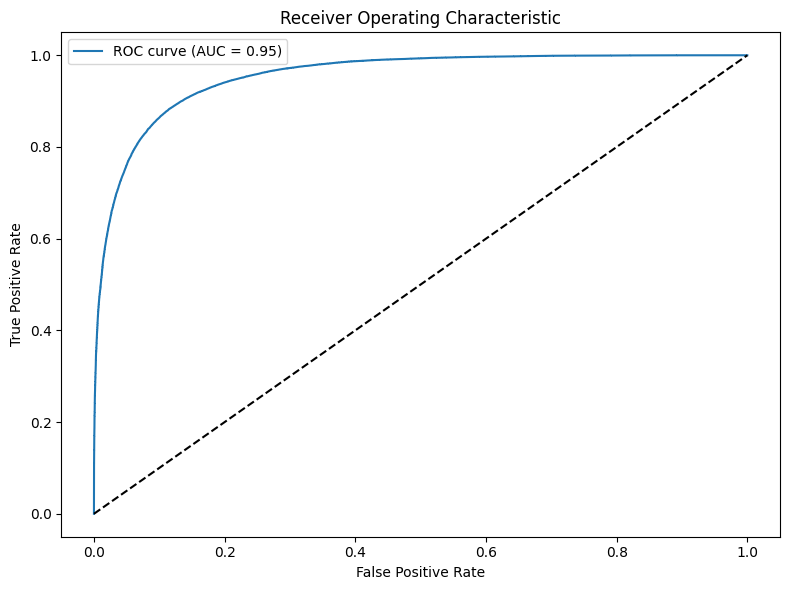

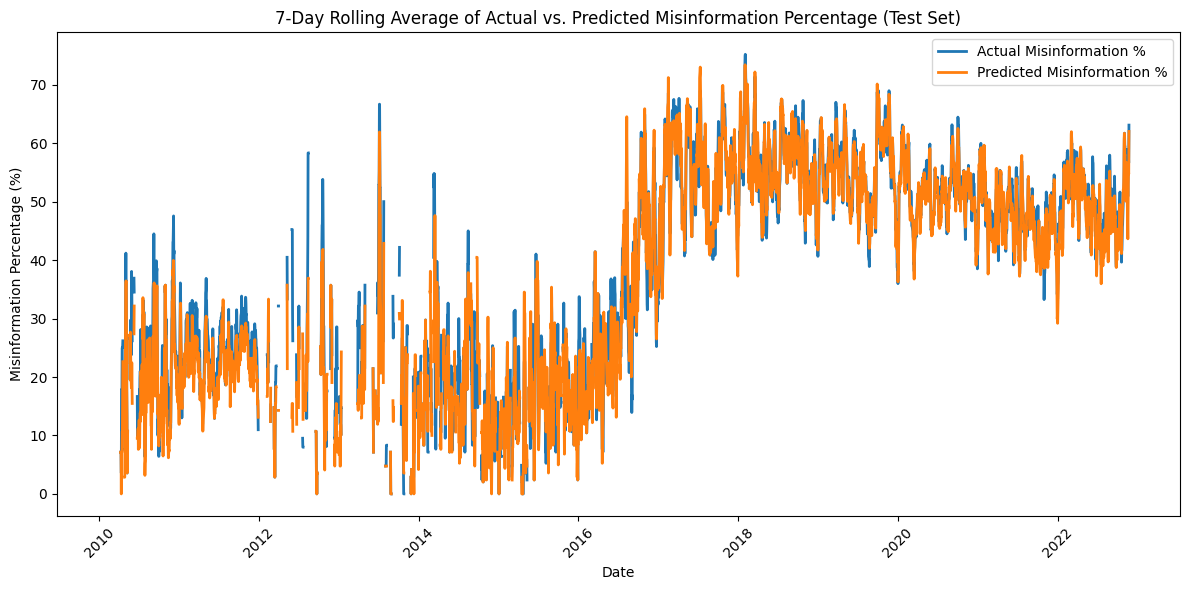

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Label the data: 0 for normal tweets, 1 for misinformation
df_tweets['label'] = 0
df_tweets_misinfo['label'] = 1

# Combine the datasets and drop duplicates based on 'text_cleaned'
df_all = pd.concat([df_tweets, df_tweets_misinfo], ignore_index=True)
df_all = df_all.drop_duplicates(subset='text_cleaned')

# Convert 'local_time' from milliseconds to datetime and create a 'date' column
df_all['date'] = pd.to_datetime(df_all['local_time'], unit='ms')

# Split the DataFrame into train and test sets while preserving the time information
df_train, df_test = train_test_split(df_all, test_size=0.2, random_state=42, stratify=df_all['label'])

# Feature extraction using TF-IDF (fit on training set, transform both)
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(df_train['text_cleaned'])
X_test = vectorizer.transform(df_test['text_cleaned'])
y_train = df_train['label']
y_test = df_test['label']

# Train a logistic regression classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # predicted probability for class 1

# Print detailed classification report
print(classification_report(y_test, y_pred))

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate ROC AUC score and plot ROC curve
auc_score = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", auc_score)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# --- Time Series Analysis ---

# Add predictions to the test DataFrame to preserve time information
df_test = df_test.copy()
df_test['y_pred'] = y_pred
df_test['y_proba'] = y_proba

# Group test data by day using the 'date' column.
df_test_daily = df_test.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    actual_misinfo=('label', 'sum'),
    predicted_misinfo=('y_pred', 'sum')
).reset_index()

# Calculate daily misinformation percentages (actual and predicted)
df_test_daily['actual_misinfo_percentage'] = 100 * df_test_daily['actual_misinfo'] / df_test_daily['total_tweets']
df_test_daily['predicted_misinfo_percentage'] = 100 * df_test_daily['predicted_misinfo'] / df_test_daily['total_tweets']

# Compute a 7-day rolling average to smooth the time series
df_test_daily['actual_roll'] = df_test_daily['actual_misinfo_percentage'].rolling(window=7, center=True).mean()
df_test_daily['predicted_roll'] = df_test_daily['predicted_misinfo_percentage'].rolling(window=7, center=True).mean()

# Plot the 7-day rolling averages of actual vs. predicted misinformation percentages over time
plt.figure(figsize=(12, 6))
plt.plot(df_test_daily['date'], df_test_daily['actual_roll'], label='Actual Misinformation %', linewidth=2)
plt.plot(df_test_daily['date'], df_test_daily['predicted_roll'], label='Predicted Misinformation %', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.title('7-Day Rolling Average of Actual vs. Predicted Misinformation Percentage (Test Set)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [40]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define regex patterns for dictionary-based labeling (using word stems)
misinfo_patterns = [
    r'fake\w*',         # matches "fake", "faked", "faking", etc.
    r'misinform\w*',    # matches "misinform", "misinformation", etc.
    r'hoax\w*',         # matches "hoax", "hoaxed", etc.
    r'conspir\w*',      # matches "conspiracy", "conspiracies", etc.
    r'scam\w*',         # matches "scam", "scammed", etc.
    r'false\w*',        # matches "false", "falsified", etc.
    r'rumor\w*',        # matches "rumor", "rumors", etc.
    r'fabricat\w*',     # matches "fabricate", "fabricated", etc.
    r'clickbait',       # matches "clickbait"
    r'propagan\w*',     # matches "propaganda", etc.
    r'decept\w*',       # matches "deception", "deceptive", etc.
    r'lie\w*',          # matches "lie", "lied", "lying", etc.
    r'myth\w*',         # matches "myth", "myths", etc.
    r'counterfeit\w*',  # matches "counterfeit", etc.
    r'bogus',           # matches "bogus"
    r'exaggerat\w*',    # matches "exaggerate", "exaggerated", etc.
    r'distort\w*',      # matches "distort", "distorted", etc.
    r'mislead\w*',      # matches "mislead", "misleading", etc.
    r'erroneous',       # matches "erroneous"
    r'impost\w*',       # matches "impostor", "imposter", etc.
    r'manipulat\w*',    # matches "manipulate", "manipulated", etc.
    r'unsubstantiat\w*' # matches "unsubstantiated", etc.
]
misinfo_regex = re.compile('|'.join(misinfo_patterns), re.IGNORECASE)

# --- Label tweets in each dataset using the dictionary method ---

# For the normal tweets dataset (df_tweets)
df_tweets['misinfo_flag'] = df_tweets['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))

# For the misinformation tweets dataset (df_tweets_misinfo)
df_tweets_misinfo['misinfo_flag'] = df_tweets_misinfo['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))

# --- Train a logistic classifier for each dataset using the dictionary labels ---

# For df_tweets (Normal Tweets)
print("Training Logistic Classifier on Normal Tweets Dataset (df_tweets)")
vectorizer_normal = TfidfVectorizer(stop_words='english')
X_normal = vectorizer_normal.fit_transform(df_tweets['text_cleaned'])
y_normal = df_tweets['misinfo_flag'].astype(int)  # Convert Boolean to integer

X_normal_train, X_normal_test, y_normal_train, y_normal_test = train_test_split(
    X_normal, y_normal, test_size=0.2, random_state=42, stratify=y_normal
)

clf_normal = LogisticRegression(max_iter=1000)
clf_normal.fit(X_normal_train, y_normal_train)
y_normal_pred = clf_normal.predict(X_normal_test)

print("Classification Report for Normal Tweets Dataset:")
print(classification_report(y_normal_test, y_normal_pred))

# For df_tweets_misinfo (Misinformation Tweets)
print("Training Logistic Classifier on Misinformation Tweets Dataset (df_tweets_misinfo)")
vectorizer_misinfo = TfidfVectorizer(stop_words='english')
X_misinfo = vectorizer_misinfo.fit_transform(df_tweets_misinfo['text_cleaned'])
y_misinfo = df_tweets_misinfo['misinfo_flag'].astype(int)

X_misinfo_train, X_misinfo_test, y_misinfo_train, y_misinfo_test = train_test_split(
    X_misinfo, y_misinfo, test_size=0.2, random_state=42, stratify=y_misinfo
)

clf_misinfo = LogisticRegression(max_iter=1000)
clf_misinfo.fit(X_misinfo_train, y_misinfo_train)
y_misinfo_pred = clf_misinfo.predict(X_misinfo_test)

print("Classification Report for Misinformation Tweets Dataset:")
print(classification_report(y_misinfo_test, y_misinfo_pred))


Training Logistic Classifier on Normal Tweets Dataset (df_tweets)
Classification Report for Normal Tweets Dataset:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     54685
           1       1.00      0.65      0.79      3010

    accuracy                           0.98     57695
   macro avg       0.99      0.83      0.89     57695
weighted avg       0.98      0.98      0.98     57695

Training Logistic Classifier on Misinformation Tweets Dataset (df_tweets_misinfo)
Classification Report for Misinformation Tweets Dataset:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     61091
           1       1.00      0.87      0.93     13590

    accuracy                           0.98     74681
   macro avg       0.99      0.94      0.96     74681
weighted avg       0.98      0.98      0.98     74681



Classification Report for Normal Tweets Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    273423
           1       1.00      0.73      0.85     15049

    accuracy                           0.99    288472
   macro avg       0.99      0.87      0.92    288472
weighted avg       0.99      0.99      0.99    288472

Classification Report for Misinformation Tweets Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    305455
           1       1.00      0.90      0.95     67949

    accuracy                           0.98    373404
   macro avg       0.99      0.95      0.97    373404
weighted avg       0.98      0.98      0.98    373404



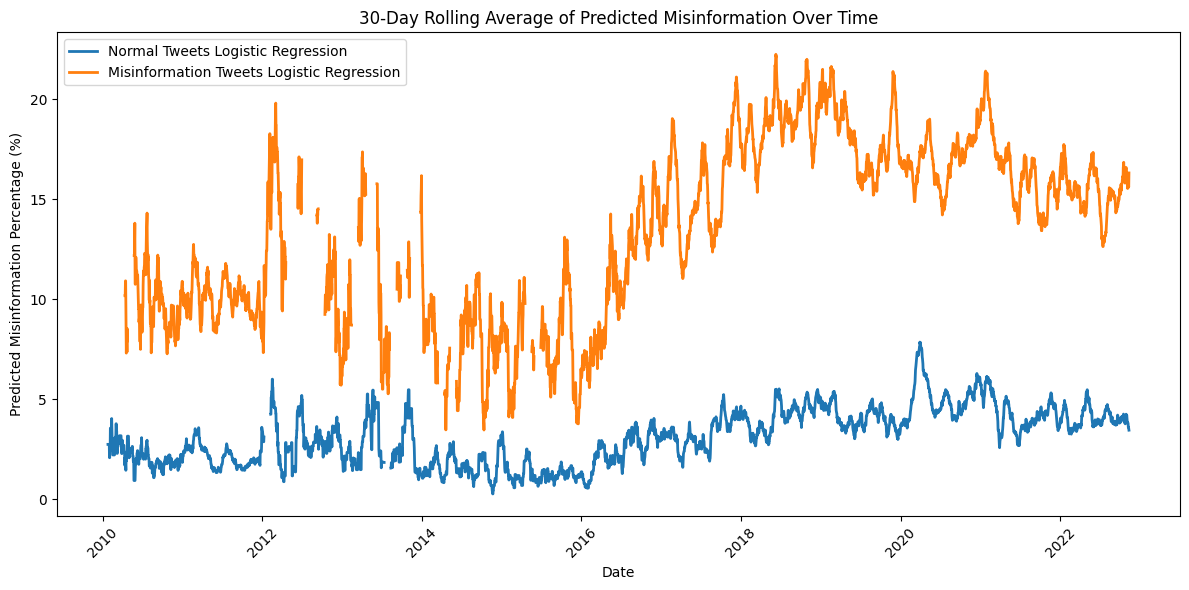

In [53]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# --- Step 1: Dictionary-based Labeling using Regex ---

# Define regex patterns for various word stems related to misinformation
misinfo_patterns = [
    r'fake\w*',         # matches "fake", "faked", "faking", etc.
    r'misinform\w*',    # matches "misinform", "misinformed", "misinformation", etc.
    r'hoax\w*',         # matches "hoax", "hoaxed", etc.
    r'conspir\w*',      # matches "conspiracy", "conspiracies", etc.
    r'scam\w*',         # matches "scam", "scammed", etc.
    r'false\w*',        # matches "false", "falsified", etc.
    r'rumor\w*',        # matches "rumor", "rumors", etc.
    r'fabricat\w*',     # matches "fabricate", "fabricated", "fabrication", etc.
    r'clickbait',       # matches "clickbait"
    r'propagan\w*',     # matches "propaganda", etc.
    r'decept\w*',       # matches "deception", "deceptive", etc.
    r'lie\w*',          # matches "lie", "lied", "lying", etc.
    r'myth\w*',         # matches "myth", "myths", etc.
    r'counterfeit\w*',  # matches "counterfeit", etc.
    r'bogus',           # matches "bogus"
    r'exaggerat\w*',    # matches "exaggerate", "exaggerated", etc.
    r'distort\w*',      # matches "distort", "distorted", etc.
    r'mislead\w*',      # matches "mislead", "misleading", etc.
    r'erroneous',       # matches "erroneous"
    r'impost\w*',       # matches "impostor", "imposter", etc.
    r'manipulat\w*',    # matches "manipulate", "manipulated", etc.
    r'unsubstantiat\w*' # matches "unsubstantiated", etc.
]
misinfo_regex = re.compile('|'.join(misinfo_patterns), re.IGNORECASE)

# Apply the dictionary-based labeling to each dataset
df_tweets['misinfo_flag'] = df_tweets['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))
df_tweets_misinfo['misinfo_flag'] = df_tweets_misinfo['text_cleaned'].apply(lambda x: bool(misinfo_regex.search(x)))

# --- Step 2: Train Logistic Regression Classifiers Separately ---

# For df_tweets (Normal Tweets Dataset)
vectorizer_normal = TfidfVectorizer(stop_words='english')
X_normal = vectorizer_normal.fit_transform(df_tweets['text_cleaned'])
y_normal = df_tweets['misinfo_flag'].astype(int)
clf_normal = LogisticRegression(max_iter=1000)
clf_normal.fit(X_normal, y_normal)

# Print classification report for the normal tweets model (using all available data)
print("Classification Report for Normal Tweets Logistic Regression:")
print(classification_report(y_normal, clf_normal.predict(X_normal)))

# For df_tweets_misinfo (Misinformation Tweets Dataset)
vectorizer_misinfo = TfidfVectorizer(stop_words='english')
X_misinfo = vectorizer_misinfo.fit_transform(df_tweets_misinfo['text_cleaned'])
y_misinfo = df_tweets_misinfo['misinfo_flag'].astype(int)
clf_misinfo = LogisticRegression(max_iter=1000)
clf_misinfo.fit(X_misinfo, y_misinfo)

# Print classification report for the misinformation tweets model (using all available data)
print("Classification Report for Misinformation Tweets Logistic Regression:")
print(classification_report(y_misinfo, clf_misinfo.predict(X_misinfo)))

# --- Step 3: Predict Using the Logistic Classifiers to Obtain Time Series Data ---

# Process Normal Tweets Dataset
df_tweets['y_pred'] = clf_normal.predict(X_normal)
df_tweets['date'] = pd.to_datetime(df_tweets['local_time'], unit='ms')
df_normal_daily = df_tweets.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_pred=('y_pred', 'sum')
).reset_index()
df_normal_daily['predicted_percentage'] = 100.0 * df_normal_daily['misinfo_pred'] / df_normal_daily['total_tweets']
df_normal_daily['roll'] = df_normal_daily['predicted_percentage'].rolling(window=30, center=True).mean()

# Process Misinformation Tweets Dataset
df_tweets_misinfo['y_pred'] = clf_misinfo.predict(X_misinfo)
df_tweets_misinfo['date'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')
df_misinfo_daily = df_tweets_misinfo.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_pred=('y_pred', 'sum')
).reset_index()
df_misinfo_daily['predicted_percentage'] = 100.0 * df_misinfo_daily['misinfo_pred'] / df_misinfo_daily['total_tweets']
df_misinfo_daily['roll'] = df_misinfo_daily['predicted_percentage'].rolling(window=30, center=True).mean()

# --- Step 4: Plot the Time Series of Predicted Misinformation Percentage Over Time ---

plt.figure(figsize=(12, 6))
plt.plot(df_normal_daily['date'], df_normal_daily['roll'], label='Normal Tweets Logistic Regression', linewidth=2)
plt.plot(df_misinfo_daily['date'], df_misinfo_daily['roll'], label='Misinformation Tweets Logistic Regression', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Predicted Misinformation Percentage (%)')
plt.title('30-Day Rolling Average of Predicted Misinformation Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
print(df_all.head())

                                        text_cleaned  retweet_count  \
0  DEFCON 5: “We have an imperative to build a ‘p...           4620   
1                                Its all happening .           1638   
2  The United States receives no oil from Lybia. ...           1700   
3  The moon is in Aries and it is full. People ar...           3051   
4  energy flows where our intention goes.... CREA...          10464   

                                                text    local_time  \
0  DEFCON 5: “We have an imperative to build a ‘p...  1.593780e+12   
1                                Its all happening .  1.422300e+12   
2  The United States receives no oil from Lybia. ...  1.299520e+12   
3  The moon is in Aries and it is full. People ar...  1.507180e+12   
4  energy flows where our intention goes.... CREA...  1.344960e+12   

                                             tweetId   id_  misinfo_flag  \
0  http://twitter.com/i/web/status/12790213512868...  BFVo         False   


        date  total_tweets  misinfo_tweets  misinfo_percentage
0 2009-11-18             1               0                 0.0
1 2009-11-19             4               0                 0.0
2 2009-11-20             0               0                 NaN
3 2009-11-21             1               0                 0.0
4 2009-11-22             3               0                 0.0


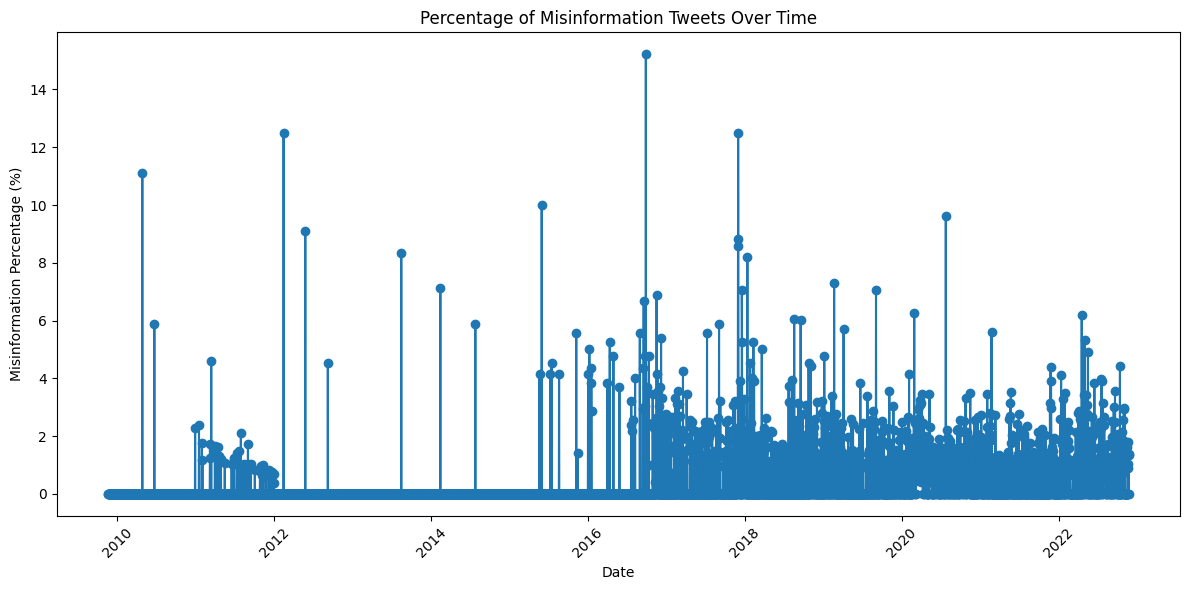

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'local_time' from milliseconds to a datetime object
df_tweets['date'] = pd.to_datetime(df_tweets['local_time'], unit='ms')

# Group by day using the new 'date' column.
df_daily = df_tweets.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_tweets=('misinfo_flag', 'sum')
).reset_index()

# Calculate the daily percentage of misinformation tweets.
df_daily['misinfo_percentage'] = 100 * df_daily['misinfo_tweets'] / df_daily['total_tweets']

# Display the first few rows of the aggregated DataFrame.
print(df_daily.head())

# Plot the percentage of misinformation tweets over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily['date'], df_daily['misinfo_percentage'], marker='o', linestyle='-')
plt.title('Percentage of Misinformation Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


        date  total_tweets  misinfo_tweets  misinfo_percentage  \
0 2009-11-18             1               0                 0.0   
1 2009-11-19             4               0                 0.0   
2 2009-11-20             0               0                 NaN   
3 2009-11-21             1               0                 0.0   
4 2009-11-22             3               0                 0.0   

   misinfo_percentage_roll  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


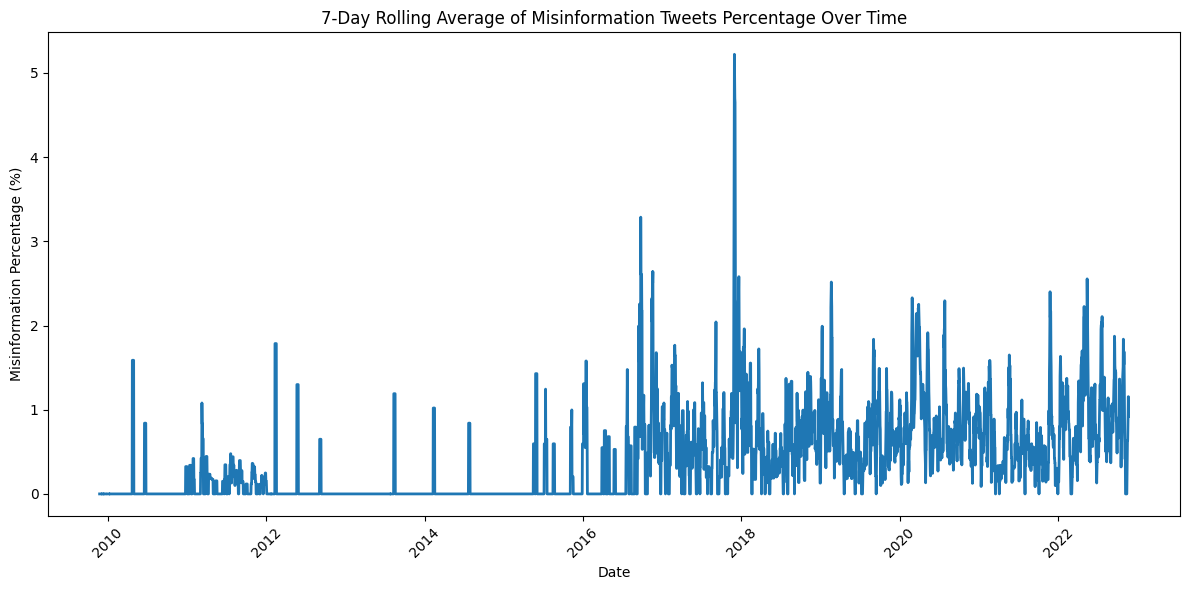

In [20]:
# Compute a 7-day rolling average for a smooth line plot.
df_daily['misinfo_percentage_roll'] = df_daily['misinfo_percentage'].rolling(window=7, center=True).mean()

# Display the first few rows of the aggregated DataFrame.
print(df_daily.head())

# Plot the 7-day rolling average of misinformation percentage over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily['date'], df_daily['misinfo_percentage_roll'], linestyle='-', linewidth=2)
plt.title('7-Day Rolling Average of Misinformation Tweets Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

        date  total_tweets  misinfo_tweets  misinfo_percentage  \
0 2009-11-18             1               0                 0.0   
1 2009-11-19             4               0                 0.0   
2 2009-11-20             0               0                 NaN   
3 2009-11-21             1               0                 0.0   
4 2009-11-22             3               0                 0.0   

   misinfo_percentage_roll  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


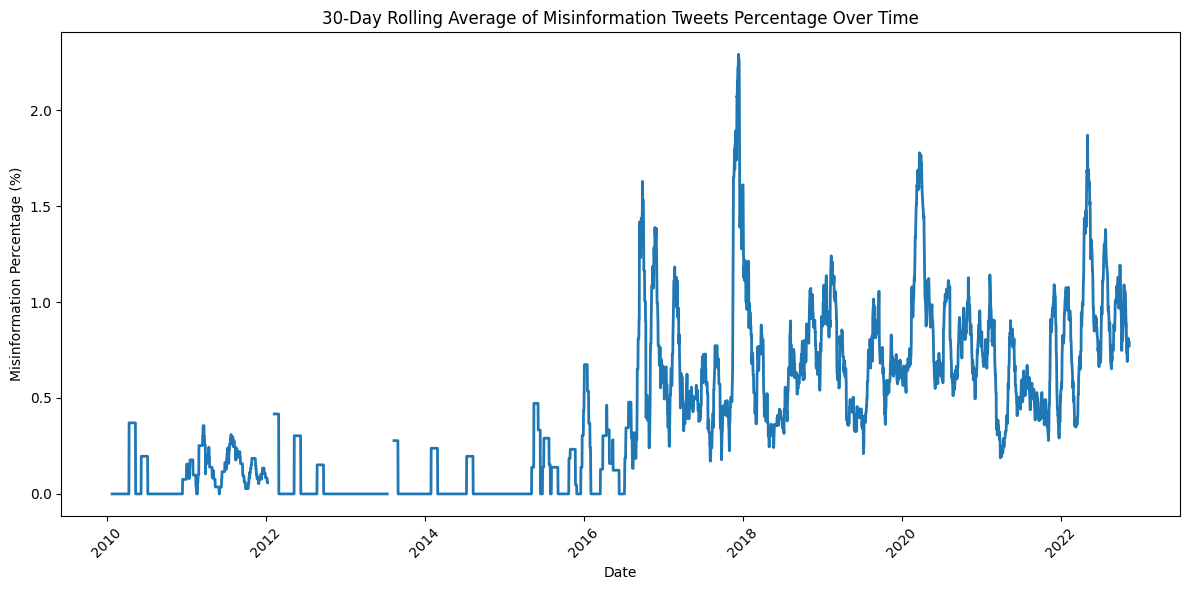

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'local_time' from milliseconds to a datetime object
df_tweets['date'] = pd.to_datetime(df_tweets['local_time'], unit='ms')

# Group by day using the new 'date' column.
df_daily = df_tweets.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_tweets=('misinfo_flag', 'sum')
).reset_index()

# Calculate the daily percentage of misinformation tweets.
df_daily['misinfo_percentage'] = 100 * df_daily['misinfo_tweets'] / df_daily['total_tweets']

# Compute a 30-day rolling average for a smooth line plot.
df_daily['misinfo_percentage_roll'] = df_daily['misinfo_percentage'].rolling(window=30, center=True).mean()

# Display the first few rows of the aggregated DataFrame.
print(df_daily.head())

# Plot the 30-day rolling average of misinformation percentage over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily['date'], df_daily['misinfo_percentage_roll'], linestyle='-', linewidth=2)
plt.title('30-Day Rolling Average of Misinformation Tweets Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


        date  total_tweets_misinfo  misinfo_tweets_misinfo  misinfo_percentage
0 2009-11-19                     3                       0                 0.0
1 2009-11-20                     0                       0                 NaN
2 2009-11-21                     0                       0                 NaN
3 2009-11-22                     1                       0                 0.0
4 2009-11-23                     2                       0                 0.0


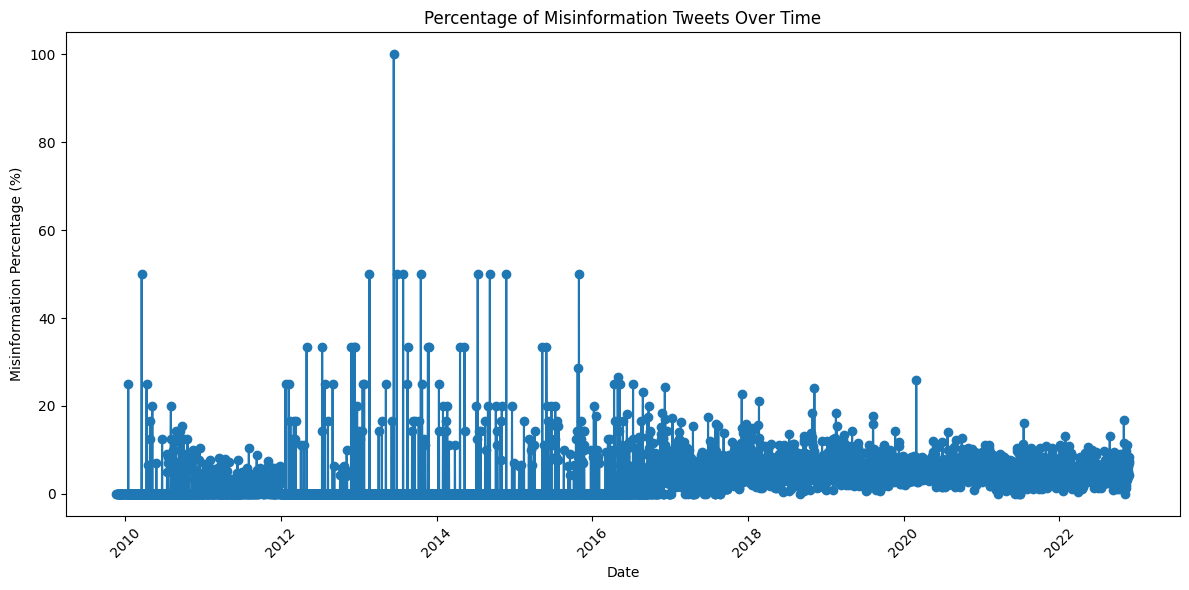

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'local_time' from milliseconds to a datetime object
df_tweets_misinfo['date'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')

# Group by day using the new 'date' column.
df_daily_misinfo = df_tweets_misinfo.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets_misinfo=('text_cleaned', 'size'),
    misinfo_tweets_misinfo=('misinfo_flag', 'sum')
).reset_index()

# Calculate the daily percentage of misinformation tweets.
df_daily_misinfo['misinfo_percentage'] = 100 * df_daily_misinfo['misinfo_tweets_misinfo'] / df_daily_misinfo['total_tweets_misinfo']

# Display the first few rows of the aggregated DataFrame.
print(df_daily_misinfo.head())

# Plot the percentage of misinformation tweets over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily_misinfo['date'], df_daily_misinfo['misinfo_percentage'], marker='o', linestyle='-')
plt.title('Percentage of Misinformation Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


        date  total_tweets_misinfo  misinfo_tweets_misinfo  \
0 2009-11-19                     3                       0   
1 2009-11-20                     0                       0   
2 2009-11-21                     0                       0   
3 2009-11-22                     1                       0   
4 2009-11-23                     2                       0   

   misinfo_percentage  misinfo_percentage_roll  
0                 0.0                      NaN  
1                 NaN                      NaN  
2                 NaN                      NaN  
3                 0.0                      NaN  
4                 0.0                      NaN  


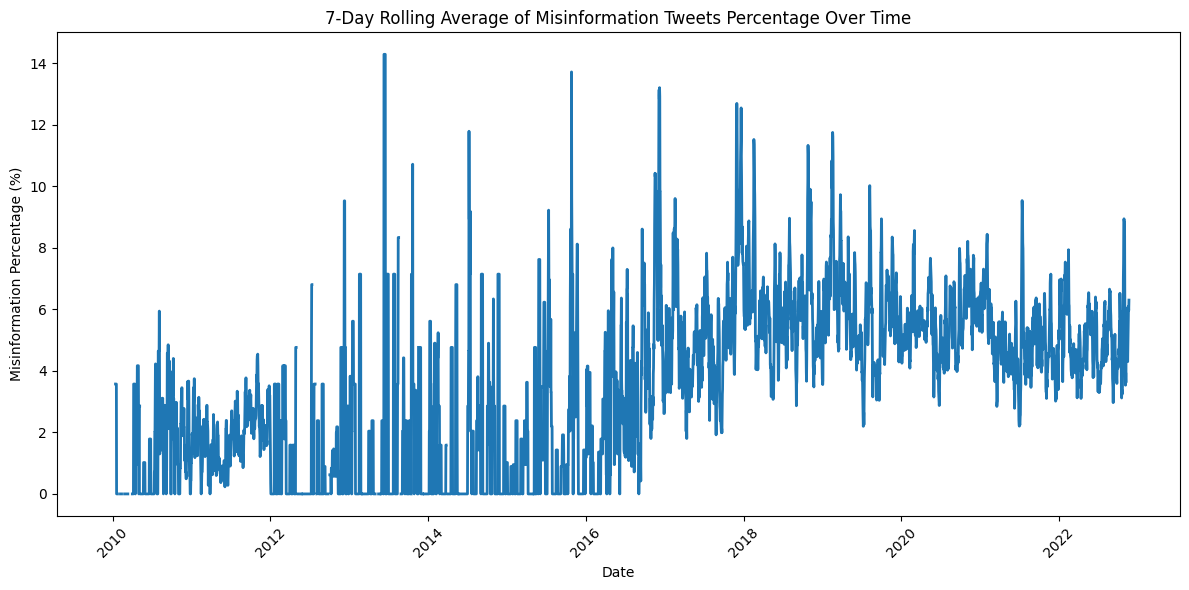

In [22]:
# Compute a 7-day rolling average for a smooth line plot.
df_daily_misinfo['misinfo_percentage_roll'] = df_daily_misinfo['misinfo_percentage'].rolling(window=7, center=True).mean()

# Display the first few rows of the aggregated DataFrame.
print(df_daily_misinfo.head())

# Plot the 7-day rolling average of misinformation percentage over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily_misinfo['date'], df_daily_misinfo['misinfo_percentage_roll'], linestyle='-', linewidth=2)
plt.title('7-Day Rolling Average of Misinformation Tweets Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

        date  total_tweets_misinfo  misinfo_tweets_misinfo  \
0 2009-11-19                     3                       0   
1 2009-11-20                     0                       0   
2 2009-11-21                     0                       0   
3 2009-11-22                     1                       0   
4 2009-11-23                     2                       0   

   misinfo_percentage  misinfo_percentage_roll  
0                 0.0                      NaN  
1                 NaN                      NaN  
2                 NaN                      NaN  
3                 0.0                      NaN  
4                 0.0                      NaN  


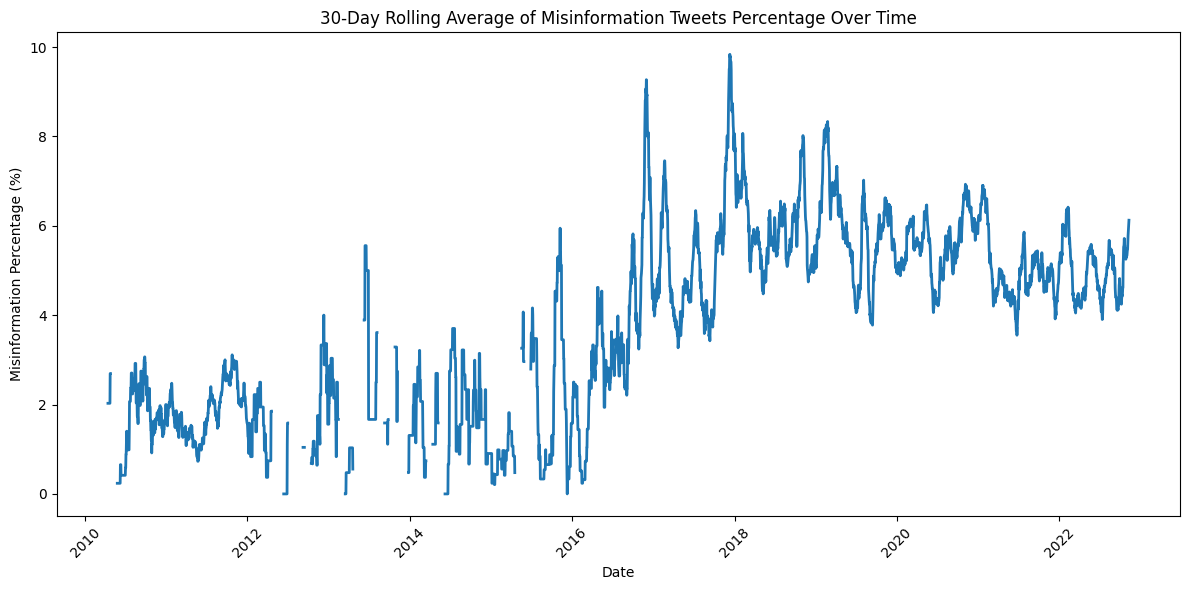

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'local_time' from milliseconds to a datetime object
df_tweets_misinfo['date'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')

# Group by day using the new 'date' column.
df_daily_misinfo = df_tweets_misinfo.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets_misinfo=('text_cleaned', 'size'),
    misinfo_tweets_misinfo=('misinfo_flag', 'sum')
).reset_index()

# Calculate the daily percentage of misinformation tweets.
df_daily_misinfo['misinfo_percentage'] = 100 * df_daily_misinfo['misinfo_tweets_misinfo'] / df_daily_misinfo['total_tweets_misinfo']

# Compute a 30-day rolling average for a smooth line plot.
df_daily_misinfo['misinfo_percentage_roll'] = df_daily_misinfo['misinfo_percentage'].rolling(window=30, center=True).mean()

# Display the first few rows of the aggregated DataFrame.
print(df_daily_misinfo.head())

# Plot the 30-day rolling average of misinformation percentage over time.
plt.figure(figsize=(12, 6))
plt.plot(df_daily_misinfo['date'], df_daily_misinfo['misinfo_percentage_roll'], linestyle='-', linewidth=2)
plt.title('30-Day Rolling Average of Misinformation Tweets Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Misinformation Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
print(df_daily_misinfo.head())

        date  total_tweets_misinfo  misinfo_tweets_misinfo
0 2009-11-19                     3                       0
1 2009-11-20                     0                       0
2 2009-11-21                     0                       0
3 2009-11-22                     1                       0
4 2009-11-23                     2                       0


In [23]:
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
from collections import Counter

# ----------------------------
# 1. Define a simple tokenizer
# ----------------------------
def simple_tokenizer(text):
    # Tokenize by extracting alphanumeric words and convert to lowercase
    return re.findall(r'\w+', text.lower())

# ----------------------------
# 2. Build a vocabulary
# ----------------------------
def build_vocab(texts, max_vocab_size=10000, specials=["<unk>", "<pad>"]):
    counter = Counter()
    for text in texts:
        tokens = simple_tokenizer(text)
        counter.update(tokens)
    # Most common tokens up to max_vocab_size (excluding specials)
    most_common = counter.most_common(max_vocab_size - len(specials))
    # Build vocab: reserve index 0 for <unk> and 1 for <pad>
    vocab = {}
    for idx, token in enumerate(specials):
        vocab[token] = idx
    for token, _ in most_common:
        if token not in vocab:
            vocab[token] = len(vocab)
    return vocab

# Build the vocabulary from your tweet texts
max_vocab_size = 10000
special_tokens = ["<unk>", "<pad>"]
vocab = build_vocab(df_all['text_cleaned'], max_vocab_size, specials=special_tokens)
pad_idx = vocab["<pad>"]

# ----------------------------
# 3. Create a Custom Dataset
# ----------------------------
class TweetDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_seq_length=100):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.max_seq_length = max_seq_length

    def tokenize_and_numericalize(self, text):
        tokens = simple_tokenizer(text)
        token_ids = [self.vocab.get(token, self.vocab["<unk>"]) for token in tokens]
        # Truncate to max_seq_length
        return token_ids[:self.max_seq_length]

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        token_ids = self.tokenize_and_numericalize(self.texts[idx])
        # Return as torch tensor
        return torch.tensor(token_ids, dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.float)

# Create the dataset (assuming df_all has been defined)
max_seq_length = 100
dataset = TweetDataset(df_all['text_cleaned'].tolist(),
                       df_all['label'].tolist(),
                       vocab,
                       max_seq_length)

# ----------------------------
# 4. Define a Collate Function for Padding
# ----------------------------
def collate_batch(batch):
    token_ids_list, labels = zip(*batch)
    # Pad sequences so that all have the same length in a batch
    token_ids_padded = pad_sequence(token_ids_list, batch_first=True, padding_value=pad_idx)
    # If padded sequences exceed max_seq_length, trim them
    if token_ids_padded.size(1) > max_seq_length:
        token_ids_padded = token_ids_padded[:, :max_seq_length]
    labels = torch.stack(labels)
    return token_ids_padded, labels

# ----------------------------
# 5. Split into Training and Test Sets and Create DataLoaders
# ----------------------------
batch_size = 32
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_batch)

# ----------------------------
# 6. Define the LSTM Model
# ----------------------------
class LSTMMisinfoClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, pad_idx):
        super(LSTMMisinfoClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        embedded = self.embedding(x)  # (batch_size, seq_len, embed_dim)
        output, (hidden, cell) = self.lstm(embedded)
        # Use the last hidden state from the final LSTM layer
        hidden = hidden[-1]  # (batch_size, hidden_dim)
        out = self.fc(hidden)
        return self.sigmoid(out)

vocab_size = len(vocab)
embed_dim = 128
hidden_dim = 64
model = LSTMMisinfoClassifier(vocab_size, embed_dim, hidden_dim, output_dim=1, pad_idx=pad_idx)

# ----------------------------
# 7. Define Loss Function and Optimizer
# ----------------------------
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ----------------------------
# 8. Training Loop
# ----------------------------
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for texts, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(texts).squeeze(1)  # outputs: (batch_size)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * texts.size(0)
    avg_loss = epoch_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# ----------------------------
# 9. Evaluation on Test Set
# ----------------------------
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for texts, labels in test_loader:
        outputs = model(texts).squeeze(1)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * texts.size(0)
        predictions = (outputs >= 0.5).float()
        correct += (predictions == labels).sum().item()

avg_test_loss = test_loss / len(test_dataset)
accuracy = correct / len(test_dataset)
print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {accuracy:.4f}")


C:\Users\jr24440\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1/5, Loss: 0.3740
Epoch 2/5, Loss: 0.2528
Epoch 3/5, Loss: 0.2289
Epoch 4/5, Loss: 0.2095
Epoch 5/5, Loss: 0.1890
Test Loss: 0.2718, Test Accuracy: 0.8891


Classification Report:
              precision    recall  f1-score   support

         0.0     0.8960    0.8889    0.8924     54989
         1.0     0.8818    0.8893    0.8855     51252

    accuracy                         0.8891    106241
   macro avg     0.8889    0.8891    0.8890    106241
weighted avg     0.8892    0.8891    0.8891    106241

Confusion Matrix:
[[48881  6108]
 [ 5674 45578]]
ROC AUC Score: 0.9589010319961297


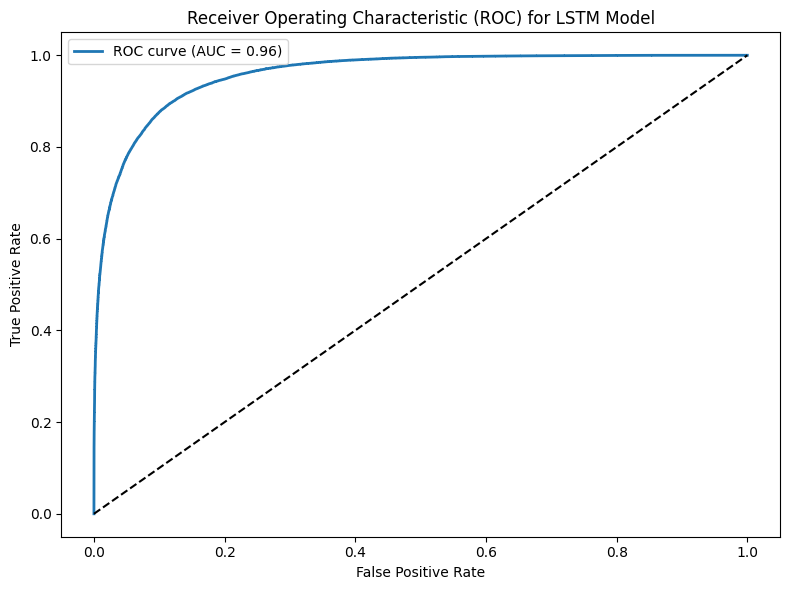

In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set the model to evaluation mode
model.eval()

# Containers for labels, predictions, and probabilities
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for texts, labels in test_loader:
        outputs = model(texts).squeeze(1)
        probs = outputs.detach().cpu().numpy()          # Predicted probabilities (for class 1)
        preds = (outputs >= 0.5).float().detach().cpu().numpy()  # Binary predictions
        all_probs.extend(probs.tolist())
        all_preds.extend(preds.tolist())
        all_labels.extend(labels.cpu().numpy().tolist())

# Compute additional statistics
print("Classification Report:")
print(classification_report(all_labels, all_preds, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))

# Compute ROC AUC Score
roc_auc = roc_auc_score(all_labels, all_probs)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LSTM Model')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [73]:
import pandas as pd
sentiment = pd.read_excel("C:/Users/jr24440/Downloads/Sentiment_metric_index_full.xlsx")

In [74]:
print(sentiment.head())

        Date  Aggregate  cluster_Business Impact  \
0 2003-01-01   0.670882                 0.724689   
1 2003-02-01   0.599651                 0.681383   
2 2003-03-01   0.405426                 0.374329   
3 2003-04-01   0.438446                 0.436445   
4 2003-05-01   0.375706                 0.414676   

   cluster_Environmental Impact  cluster_Societal Debate  cluster_Research  \
0                      0.634144                 0.522989          0.540001   
1                      0.575126                 0.358989          0.517911   
2                      0.454074                 0.402151          0.322407   
3                      0.328511                 0.457464          0.335117   
4                      0.294991                 0.344434          0.262923   

   Agreements/Actions  Agriculture Shifts  Airline Industry  Arctic Wildlife  \
0            0.723770            0.579213          0.617377         0.473769   
1            0.711091            0.227526          0.49289

In [75]:
print(sentiment.describe())

                                Date   Aggregate  cluster_Business Impact  \
count                            258  258.000000               258.000000   
mean   2013-09-15 15:09:46.046511616    1.263964                 1.066897   
min              2003-01-01 00:00:00    0.268712                 0.276916   
25%              2008-05-08 18:00:00    0.840365                 0.735225   
50%              2013-09-16 00:00:00    1.108101                 1.009317   
75%              2019-01-24 06:00:00    1.674161                 1.308288   
max              2024-06-01 00:00:00    2.790996                 2.639918   
std                              NaN    0.563003                 0.432197   

       cluster_Environmental Impact  cluster_Societal Debate  \
count                    258.000000               258.000000   
mean                       1.261238                 1.223693   
min                        0.227101                 0.221174   
25%                        0.837008               

In [76]:
import pandas as pd

# Convert 'local_time' to datetime for both datasets
df_tweets['date'] = pd.to_datetime(df_tweets['local_time'], unit='ms')
df_tweets_misinfo['date'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')

# For the normal tweets dataset: group by day and compute counts
df_normal_daily = df_tweets.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_count=('misinfo_flag', 'sum')
).reset_index()

# Optionally, compute the daily percentage of tweets flagged as misinformation
df_normal_daily['misinfo_percentage'] = 100.0 * df_normal_daily['misinfo_count'] / df_normal_daily['total_tweets']

# For the misinformation tweets dataset: group by day and compute counts
df_misinfo_daily = df_tweets_misinfo.groupby(pd.Grouper(key='date', freq='D')).agg(
    total_tweets=('text_cleaned', 'size'),
    misinfo_count=('misinfo_flag', 'sum')
).reset_index()

# Optionally, compute the daily percentage of tweets flagged as misinformation
df_misinfo_daily['misinfo_percentage'] = 100.0 * df_misinfo_daily['misinfo_count'] / df_misinfo_daily['total_tweets']

# Display the first few rows of each aggregated DataFrame
print("Normal Tweets Daily Aggregation:")
print(df_normal_daily.head())

print("\nMisinformation Tweets Daily Aggregation:")
print(df_misinfo_daily.head())


Normal Tweets Daily Aggregation:
        date  total_tweets  misinfo_count  misinfo_percentage
0 2009-11-18             1              0                 0.0
1 2009-11-19             4              0                 0.0
2 2009-11-20             0              0                 NaN
3 2009-11-21             1              0                 0.0
4 2009-11-22             3              0                 0.0

Misinformation Tweets Daily Aggregation:
        date  total_tweets  misinfo_count  misinfo_percentage
0 2009-11-19             3              0                 0.0
1 2009-11-20             0              0                 NaN
2 2009-11-21             0              0                 NaN
3 2009-11-22             1              0                 0.0
4 2009-11-23             2              0                 0.0


In [82]:
import pandas as pd

# -----------------------------
# Process the External Sentiment Dataset
# -----------------------------
# Assume df_sentiment is already loaded and has a column named "Date".
sentiment['Date'] = pd.to_datetime(sentiment['Date'])
# Filter for data from 2012 onward.
sentiment = sentiment[sentiment['Date'] >= '2012-01-01']

# -----------------------------
# Process the Normal Tweets Dataset (df_tweets)
# -----------------------------
# Convert 'local_time' (in ms) to datetime.
df_tweets['date'] = pd.to_datetime(df_tweets['local_time'], unit='ms')
# Filter for tweets from 2012 onward.
df_tweets = df_tweets[df_tweets['date'] >= '2012-01-01']

# Group by month (using month start 'MS') to calculate total tweets and number flagged as misinformation.
df_normal_monthly = df_tweets.groupby(pd.Grouper(key='date', freq='MS')).agg(
    total_tweets_normal=('text_cleaned', 'size'),
    misinfo_count_normal=('misinfo_flag', 'sum')
).reset_index()

# Rename the datetime column to "Date" to facilitate merging.
df_normal_monthly.rename(columns={'date': 'Date'}, inplace=True)

# -----------------------------
# Process the Misinformation Tweets Dataset (df_tweets_misinfo)
# -----------------------------
# Convert 'local_time' (in ms) to datetime.
df_tweets_misinfo['date'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')
# Filter for tweets from 2012 onward.
df_tweets_misinfo = df_tweets_misinfo[df_tweets_misinfo['date'] >= '2012-01-01']

# Group by month.
df_misinfo_monthly = df_tweets_misinfo.groupby(pd.Grouper(key='date', freq='MS')).agg(
    total_tweets_misinfo=('text_cleaned', 'size'),
    misinfo_count_misinfo=('misinfo_flag', 'sum')
).reset_index()

# Rename the datetime column to "Date" for merging.
df_misinfo_monthly.rename(columns={'date': 'Date'}, inplace=True)

# -----------------------------
# Merge the Datasets
# -----------------------------
# Merge df_sentiment with normal tweets monthly aggregation.
df_merged = pd.merge(sentiment, df_normal_monthly, on='Date', how='left')
# Merge the result with the misinformation tweets monthly aggregation.
df_merged = pd.merge(df_merged, df_misinfo_monthly, on='Date', how='left')

# Optionally, you can fill any missing values (e.g., months with no tweet data) with zeros.
#df_merged[['total_tweets_normal', 'misinfo_count_normal', 'total_tweets_misinfo', 'misinfo_count_misinfo']] = \
#    df_merged[['total_tweets_normal', 'misinfo_count_normal', 'total_tweets_misinfo', 'misinfo_count_misinfo']].fillna(0)

# Display the first few rows of the merged DataFrame.
print(df_merged.head())


        Date  Aggregate  cluster_Business Impact  \
0 2012-01-01   0.726099                 0.662646   
1 2012-02-01   0.633156                 0.674654   
2 2012-03-01   0.741696                 0.702173   
3 2012-04-01   0.696257                 0.725261   
4 2012-05-01   0.646961                 0.622659   

   cluster_Environmental Impact  cluster_Societal Debate  cluster_Research  \
0                      0.757232                 0.623863          0.725238   
1                      0.571445                 0.801655          0.554006   
2                      0.880664                 0.787672          0.753214   
3                      0.639356                 0.608206          0.497776   
4                      0.611470                 0.570841          0.609736   

   Agreements/Actions  Agriculture Shifts  Airline Industry  Arctic Wildlife  \
0            0.516620            1.287339          1.662062         0.221007   
1            0.425696            0.708113          1.55524

In [84]:
# Fill missing tweet count values with 0.
cols_counts = ['total_tweets_normal', 'misinfo_count_normal',
               'total_tweets_misinfo', 'misinfo_count_misinfo']
df_merged[cols_counts] = df_merged[cols_counts].fillna(0)

# We'll use MinMaxScaler to bring tweet counts to a [0, 1] scale,
# making them comparable to the sentiment variables.
scaler = MinMaxScaler()
df_merged_norm = df_merged.copy()
df_merged_norm[cols_counts] = scaler.fit_transform(df_merged[cols_counts])

# Display the first few rows of the merged, normalized dataset.
print(df_merged_norm.head())

        Date  Aggregate  cluster_Business Impact  \
0 2012-01-01   0.726099                 0.662646   
1 2012-02-01   0.633156                 0.674654   
2 2012-03-01   0.741696                 0.702173   
3 2012-04-01   0.696257                 0.725261   
4 2012-05-01   0.646961                 0.622659   

   cluster_Environmental Impact  cluster_Societal Debate  cluster_Research  \
0                      0.757232                 0.623863          0.725238   
1                      0.571445                 0.801655          0.554006   
2                      0.880664                 0.787672          0.753214   
3                      0.639356                 0.608206          0.497776   
4                      0.611470                 0.570841          0.609736   

   Agreements/Actions  Agriculture Shifts  Airline Industry  Arctic Wildlife  \
0            0.516620            1.287339          1.662062         0.221007   
1            0.425696            0.708113          1.55524

In [85]:
import statsmodels.formula.api as smf

# Extract year from the Date column for fixed effects.
df_merged_norm['year'] = df_merged_norm['Date'].dt.year.astype('category')

# Define the regression formula.
# We include:
# - All sentiment and impact variables (e.g., Aggregate, clusters, Agreements/Actions, etc.)
# - Tweet count variables: total_tweets_normal, misinfo_count_normal, total_tweets_misinfo, misinfo_count_misinfo
# - Interaction terms between total_tweets_normal and misinfo_count_normal and between total_tweets_misinfo and misinfo_count_misinfo.
# - Year fixed effects via C(year)
formula = (
    "Q('cluster_Business Impact') ~ Aggregate + Q('cluster_Environmental Impact') + "
    "Q('cluster_Societal Debate') + Q('cluster_Research') + Q('Agreements/Actions') + "
    "Q('Agriculture Shifts') + Q('Airline Industry') + Q('Arctic Wildlife') + "
    "Q('Renewable Energy') + Q('Scientific Studies') + Q('Social Events') + Tourism + "
    "Q('UN/IPCC Reports') + Q('Water/Drought') + total_tweets_normal + misinfo_count_normal + "
    "total_tweets_misinfo + misinfo_count_misinfo + "
    "total_tweets_normal:misinfo_count_normal + total_tweets_misinfo:misinfo_count_misinfo + C(year)"
)

# Fit the model using OLS.
model = smf.ols(formula, data=df_merged_norm).fit()

# Print the regression summary.
print(model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     Q('cluster_Business Impact')   R-squared:                       0.946
Model:                                      OLS   Adj. R-squared:                  0.931
Method:                           Least Squares   F-statistic:                     63.51
Date:                          Mon, 31 Mar 2025   Prob (F-statistic):           8.03e-60
Time:                                  14:14:37   Log-Likelihood:                 141.15
No. Observations:                           150   AIC:                            -216.3
Df Residuals:                               117   BIC:                            -116.9
Df Model:                                    32                                         
Covariance Type:                      nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]